In [43]:
# import section
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

In [44]:
def read_dataset(path):
    # read dataset
    ds = xr.open_dataset(path)
    # sort by temperature bias
    ds = ds.sortby('temp_bias')
    # cast normalized dimension from int to bool
    ds['normalized'] = [bool(norm) for norm in ds.normalized]

    return ds

In [50]:
path = '/Users/oberrauch/work/master/data/cluster_output/single_glaciers/eq_runs.nc'
ds_ = read_dataset(path)
var = 'volume'
title=''
suptitle=''
xlim=[0,1e3]

In [47]:
path = '/Users/oberrauch/work/master/data/cluster_output/single_glaciers/hef_mb_elev_never.nc'
ds_fl_nofb = xr.load_dataset(path)

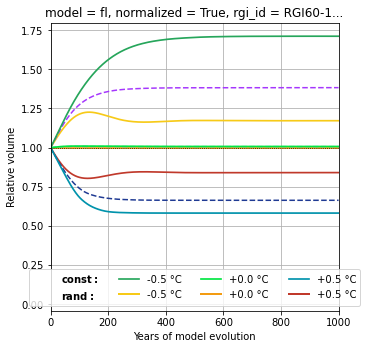

In [52]:
norm = True
ds = ds_.sel(normalized=norm, rgi_id='RGI60-11.00897')

# define color cycles
vas_cycle = np.array(['#f7ca18', '#f39c12', '#c0392b', '#22313f', '#4d13d1', '#59abe3'])
fl_cycle = np.array(["#4ecdc4", "#1f3a93", "#a537fd", "#26a65b", "#00e640", "#0093ac"])

# define fig size and axes size and location
figsize = [4, 4]
ax_size = [0, 0, 1, 1]

# ----------------------------
#        SCALING MODEL
# ----------------------------
fig_vas = plt.figure(figsize=figsize)
ax = fig_vas.add_axes(ax_size)
# flowline model
ds.sel(model='fl', mb_model='constant')[var].plot(hue='temp_bias', ax=ax, add_legend=False, color='lightgray',
                                                  lw=0.5)
# vas model
ax.set_prop_cycle('color', vas_cycle)
handles_vas_c = ds.sel(model='vas', mb_model='constant')[var].plot(hue='temp_bias', ax=ax, add_legend=False, lw=1.7,
                                                                   ls='-')
ax.set_prop_cycle('color', fl_cycle)
ds_fl_nofb.sel(mb_model='constant', model='fl', normalized=1, rgi_id='RGI60-11.00897').volume.plot.line(x='time', ls='--')
ax.set_prop_cycle('color', fl_cycle[3:])
handles_vas_c = ds.sel(model='fl', mb_model='constant')[var].plot(hue='temp_bias', ax=ax, add_legend=False, lw=1.7,
                                                                   ls='-')


# define legend labels
labels_vas = ["$\\bf{const:}$", "$\\bf{rand:}$"]
labels_vas.extend(np.array(['{:+.1f} °C'.format(bias) for bias in ds.temp_bias.values]).repeat(2))
# define legend handles
title_proxy, = plt.plot(0, marker='None', linestyle='None', label='dummy')
handles_vas = list(np.array(np.repeat(title_proxy, 2)))
handles_vas.extend(np.array([handles_vas_c, handles_vas_r]).T.flatten())

# set axes limits
if xlim:
    ax.set_xlim(xlim)
else:
    ax.set_xlim([ds.time.min(), ds.time.max()])
ylim = ax.get_ylim()
ax.set_ylim([ylim[0] * 0.5, ylim[1]])

# title, labels, legend
if title:
    ax.set_title(title[0])
ax.set_xlabel('Years of model evolution')
ax.legend(handles_vas, labels_vas, title='',
          bbox_to_anchor=(0.5, 0), loc=8, ncol=4)
if ds.normalized:
    # add ylabel
    ax.set_ylabel('Relative {}'.format(var))
    # aux line
    ax.axhline(1, lw=0.8, ls=':', c='k')
else:
    # add ylabel
    unit = 'm' if var == 'length' else 'm$^2$' if var == 'area' else 'm$^3$'
    ax.set_ylabel('Glacier {} [{}]'.format(var, unit))
    # aux line
    ax.axhline(ds.sel(model='vas')[var].isel(time=0).mean(), lw=0.8, ls=':', c='k')

ax.grid()

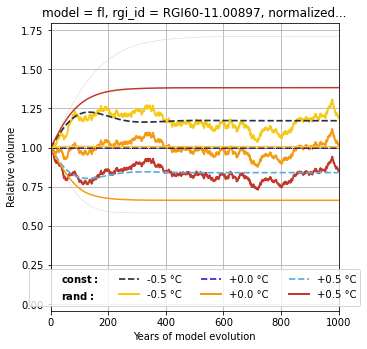

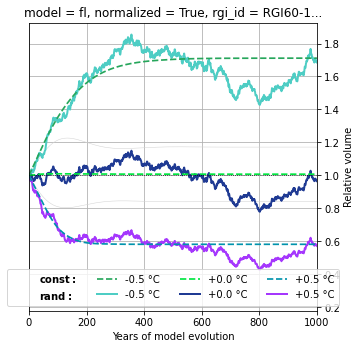

In [51]:
mb_model = 'random'
norm = True
ds = ds_.sel(normalized=norm, rgi_id='sum')

# define color cycles
vas_cycle = np.array(['#f7ca18', '#f39c12', '#c0392b', '#22313f', '#4d13d1', '#59abe3'])
fl_cycle = np.array(["#4ecdc4", "#1f3a93", "#a537fd", "#26a65b", "#00e640", "#0093ac"])

# define fig size and axes size and location
figsize = [4, 4]
ax_size = [0, 0, 1, 1]

# ----------------------------
#        SCALING MODEL
# ----------------------------
fig_vas = plt.figure(figsize=figsize)
ax = fig_vas.add_axes(ax_size)
# flowline model
ds.sel(model='fl', mb_model='constant')[var].plot(hue='temp_bias', ax=ax, add_legend=False, color='lightgray',
                                                  lw=0.5)
# vas model
ax.set_prop_cycle('color', vas_cycle)
handles_vas_r = ds.sel(model='vas', mb_model='random')[var].plot(hue='temp_bias', ax=ax, add_legend=False, lw=2)
handles_vas_c = ds.sel(model='vas', mb_model='constant')[var].plot(hue='temp_bias', ax=ax, add_legend=False, lw=1.7,
                                                                   ls='--')

# define legend labels
labels_vas = ["$\\bf{const:}$", "$\\bf{rand:}$"]
labels_vas.extend(np.array(['{:+.1f} °C'.format(bias) for bias in ds.temp_bias.values]).repeat(2))
# define legend handles
title_proxy, = plt.plot(0, marker='None', linestyle='None', label='dummy')
handles_vas = list(np.array(np.repeat(title_proxy, 2)))
handles_vas.extend(np.array([handles_vas_c, handles_vas_r]).T.flatten())

# set axes limits
if xlim:
    ax.set_xlim(xlim)
else:
    ax.set_xlim([ds.time.min(), ds.time.max()])
ylim = ax.get_ylim()
ax.set_ylim([ylim[0] * 0.5, ylim[1]])

# title, labels, legend
if title:
    ax.set_title(title[0])
ax.set_xlabel('Years of model evolution')
ax.legend(handles_vas, labels_vas, title='',
          bbox_to_anchor=(0.5, 0), loc=8, ncol=4)
if ds.normalized:
    # add ylabel
    ax.set_ylabel('Relative {}'.format(var))
    # aux line
    ax.axhline(1, lw=0.8, ls=':', c='k')
else:
    # add ylabel
    unit = 'm' if var == 'length' else 'm$^2$' if var == 'area' else 'm$^3$'
    ax.set_ylabel('Glacier {} [{}]'.format(var, unit))
    # aux line
    ax.axhline(ds.sel(model='vas')[var].isel(time=0).mean(), lw=0.8, ls=':', c='k')

ax.grid()

# ----------------------------
#        FLOWLINE MODEL
# ----------------------------
fig_fl = plt.figure(figsize=figsize)
ax = fig_fl.add_axes(ax_size)

# vas model
ds.sel(model='vas', mb_model='constant')[var].plot(hue='temp_bias', ax=ax, add_legend=False, color='lightgray',
                                                   lw=0.5)
# flowline model
ax.set_prop_cycle('color', fl_cycle)
handles_fl_r = ds.sel(model='fl', mb_model='random')[var].plot(hue='temp_bias', ax=ax, add_legend=False, lw=2)
handles_fl_c = ds.sel(model='fl', mb_model='constant')[var].plot(hue='temp_bias', ax=ax, add_legend=False, lw=1.7,
                                                                 ls='--')

# define legend labels
labels_fl = ["$\\bf{const:}$", "$\\bf{rand:}$"]
labels_fl.extend(np.array(['{:+.1f} °C'.format(bias) for bias in ds.temp_bias.values]).repeat(2))
# define legend handles
handles_fl = list(np.array(np.repeat(title_proxy, 2)))
handles_fl.extend(np.array([handles_fl_c, handles_fl_r]).T.flatten())

# set axes limits
if xlim:
    ax.set_xlim(xlim)
else:
    ax.set_xlim([ds.time.min(), ds.time.max()])
ylim = ax.get_ylim()
ax.set_ylim([ylim[0] * 0.5, ylim[1]])

# title, labels, legend
if title:
    ax.set_title(title[0])
ax.set_xlabel('Years of model evolution')
ax.legend(handles_fl, labels_fl, bbox_to_anchor=(0.5, 0), loc=8, ncol=4)
ax.yaxis.tick_right()
ax.yaxis.set_label_position('right')
if ds.normalized:
    # add ylabel
    ax.set_ylabel('Relative {}'.format(var))
    # aux line
    ax.axhline(1, lw=0.8, ls=':', c='k')
else:
    # add ylabel
    unit = 'm' if var == 'length' else 'm$^2$' if var == 'area' else 'm$^3$'
    ax.set_ylabel('Glacier {} [{}]'.format(var, unit))
    # aux line
    ax.axhline(ds.sel(model='fl')[var].isel(time=0).mean(), lw=0.8, ls=':', c='k')

ax.grid()

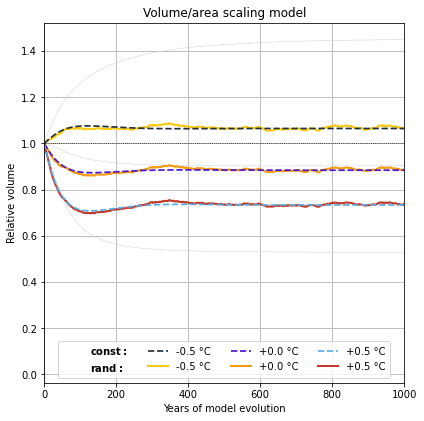

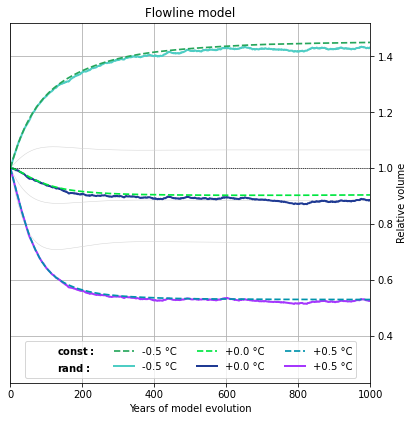

In [205]:
mb_model = 'random'
norm = True
ds = ds_.sel(normalized=norm, rgi_id='sum')

# define color cycles
vas_cycle = np.array(['#f7ca18', '#f39c12', '#c0392b', '#22313f', '#4d13d1', '#59abe3'])
fl_cycle = np.array(["#4ecdc4", "#1f3a93", "#a537fd", "#26a65b", "#00e640", "#0093ac"])

# plot relative volume change
fig = plt.figure(figsize=[5,5])
ax = fig.add_axes([0,0,1,1])

# flowline model
# ds.sel(model='fl', mb_model='random')[var].plot(hue='temp_bias', ax=ax, add_legend=False, color='lightgray', lw=0.5)
ds.sel(model='fl', mb_model='constant')[var].plot(hue='temp_bias', ax=ax, add_legend=False, color='lightgray', lw=0.5)
# vas model
ax.set_prop_cycle('color', vas_cycle)
handles_vas_r = ds.sel(model='vas', mb_model='random')[var].plot(hue='temp_bias', ax=ax, add_legend=False, lw=2)
handles_vas_c = ds.sel(model='vas', mb_model='constant')[var].plot(hue='temp_bias', ax=ax, add_legend=False, lw=1.7, ls='--')

# define legend labels
labels_vas = ["$\\bf{const:}$", "$\\bf{rand:}$"]
labels_vas.extend(np.array(['{:+.1f} °C'.format(bias) for bias in ds.temp_bias.values]).repeat(2))
# define legend handles
title_proxy, = plt.plot(0, marker='None', linestyle='None', label='dummy')
handles_vas = list(np.array(np.repeat(title_proxy, 2)))
handles_vas.extend(np.array([handles_vas_c, handles_vas_r]).T.flatten())

# set axes limits
if xlim:
    ax.set_xlim(xlim)
else:
    ax.set_xlim([ds.time.min(), ds.time.max()])
ylim = ax.get_ylim()
ax.set_ylim([ylim[0] * 0.5, ylim[1]])

# title, labels, legend
ax.set_title('Volume/area scaling model')
ax.set_xlabel('Years of model evolution')
ax.legend(handles_vas, labels_vas, title='',
           bbox_to_anchor=(0.5, 0), loc=8, ncol=4)
if ds.normalized:
    # add ylabel
    ax.set_ylabel('Relative {}'.format(var))
    # aux line
    ax.axhline(1, lw=0.8, ls=':', c='k')
else:
    # add ylabel
    unit = 'm' if var == 'length' else 'm$^2$' if var == 'area' else 'm$^3$'
    ax.set_ylabel('Glacier {} [{}]'.format(var, unit))
    # aux line
    ax.axhline(ds.sel(model='vas')[var].isel(time=0).mean(), lw=0.8, ls=':', c='k')

ax.grid()

# plot relative volume change
fig = plt.figure(figsize = figsize)
ax = fig.add_axes(ax_size)

# vas model
ds.sel(model='vas', mb_model='constant')[var].plot(hue='temp_bias', ax=ax, add_legend=False, color='lightgray', lw=0.5)
# flowline model
ax.set_prop_cycle('color', fl_cycle)
handles_fl_r = ds.sel(model='fl', mb_model='random')[var].plot(hue='temp_bias', ax=ax, add_legend=False, lw=2)
handles_fl_c = ds.sel(model='fl', mb_model='constant')[var].plot(hue='temp_bias', ax=ax, add_legend=False, lw=1.7, ls='--')

# define legend labels
labels_fl = ["$\\bf{const:}$", "$\\bf{rand:}$"]
labels_fl.extend(np.array(['{:+.1f} °C'.format(bias) for bias in ds.temp_bias.values]).repeat(2))
# define legend handles
handles_fl = list(np.array(np.repeat(title_proxy, 2)))
handles_fl.extend(np.array([handles_fl_c, handles_fl_r]).T.flatten())

# set axes limits
if xlim:
    ax.set_xlim(xlim)
else:
    ax.set_xlim([ds.time.min(), ds.time.max()])
ylim = ax.get_ylim()
ax.set_ylim([ylim[0] * 0.5, ylim[1]])

# title, labels, legend
ax.set_title('Flowline model')
ax.set_xlabel('Years of model evolution')
ax.legend(handles_fl, labels_fl, bbox_to_anchor=(0.5, 0), loc=8, ncol=4)
ax.yaxis.tick_right()
ax.yaxis.set_label_position('right')
if ds.normalized:
    # add ylabel
    ax.set_ylabel('Relative {}'.format(var))
    # aux line
    ax.axhline(1, lw=0.8, ls=':', c='k')
else:
    # add ylabel
    unit = 'm' if var == 'length' else 'm$^2$' if var == 'area' else 'm$^3$'
    ax.set_ylabel('Glacier {} [{}]'.format(var, unit))
    # aux line
    ax.axhline(ds.sel(model='fl')[var].isel(time=0).mean(), lw=0.8, ls=':', c='k')

ax.grid()

# add suptitle
if suptitle:
    fig.suptitle(suptitle, fontsize=15)


In [225]:
tmp = '{0}{1}{empty}'.format('a', path, empty='123')
tmp.format(1e3)

'a/Users/oberrauch/work/master/data/cluster_output/histalp_commitment/eq_runs.nc123'

---

**NOTE**: This is a legacy section, now in its own and curated notebook `hef_histalp_commitment.ipynb`

---

### Quantitative analysis of HISTALP commitment run

In [404]:
# read dataset
path = '/Users/oberrauch/work/master/data/cluster_output/histalp_commitment/eq_runs.nc'
ds = read_dataset(path)

**Final volume of constant mass balance scenario**

In [407]:
# get table with final values of volume for constant mb model
var = 'volume'
mb_m = 'constant'
data = list()

for m in ds.model.values:
    for b in ds.temp_bias.values:
        # select last volume entry from dataset by model and temperature bias
        ds_abs = ds.sel(mb_model=mb_m, model=m, normalized=False, temp_bias=b, rgi_id='sum').isel(time=1000)['volume']
        ds_norm = ds.sel(mb_model=mb_m, model=m, normalized=True, temp_bias=b, rgi_id='sum').isel(time=1000)['volume']
        data.append([ds_abs.values/1e9, ds_norm.values])
        
table = pd.DataFrame(data,
                     index=pd.MultiIndex.from_tuples(list(zip(np.repeat(['vas', 'flowline'], 3),
                                                              np.tile([-.5, 0, .5], 2)))),
                     columns=pd.MultiIndex.from_tuples(list(zip(np.repeat(['volume'], 2),
                                                                np.tile(['abs', 'norm'], 1)))),)
table

volume                    
                      abs                norm
vas      -0.5  138.928687  1.0646429880681376
          0.0  115.378712  0.8841740263679947
          0.5   95.759663   0.733828671842229
flowline -0.5  236.267252  1.4497764419510573
          0.0  147.272203  0.9036336459894644
          0.5   86.410636  0.5290866270563238

**Difference between constant and random mass balance models in the last 200 years**

In [409]:
# get table with min/mean/max differences in volume between mb models
var = 'volume'
data = list()
for m in ds.model.values:
    for b in ds.temp_bias.values:
        # select volume from dataset by model and temperature bias
        ds_abs = ds.sel(model=m, normalized=False, temp_bias=b, rgi_id='sum').isel(time=slice(800,1000))['volume']
        ds_norm = ds.sel(model=m, normalized=True, temp_bias=b, rgi_id='sum').isel(time=slice(800,1000))['volume']
        # compute absolute differences between the mass balance models
        diff_abs = abs(ds_abs.diff(dim='mb_model').values)
        diff_norm = abs(ds_norm.diff(dim='mb_model').values)
        data.append([diff_abs.min(), diff_norm.min(),
                     diff_abs.mean(), diff_norm.mean(),
                     diff_abs.max(), diff_norm.max()])
        

table = pd.DataFrame(data,
                     index=pd.MultiIndex.from_tuples(list(zip(np.repeat(['vas', 'flowline'], 3),
                                                              np.tile([-.5, 0, .5], 2)))),
                     columns=pd.MultiIndex.from_tuples(list(zip(np.repeat(['min', 'mean', 'max'], 2),
                                                                np.tile(['abs', 'norm'], 3)))),)
table

min                    mean                     max  \
                        abs      norm           abs      norm           abs   
vas      -0.5  1.133246e+07  0.000087  9.448345e+08  0.007240  1.859512e+09   
          0.0  2.585995e+06  0.000020  8.396479e+08  0.006434  1.670716e+09   
          0.5  1.726351e+07  0.000132  7.635744e+08  0.005851  1.520954e+09   
flowline -0.5  2.475760e+09  0.014744  3.423249e+09  0.020560  4.815554e+09   
          0.0  2.256829e+09  0.013845  3.674701e+09  0.022545  5.267917e+09   
          0.5  3.677077e+06  0.000023  1.156423e+09  0.007081  2.583255e+09   

                         
                   norm  
vas      -0.5  0.014250  
          0.0  0.012803  
          0.5  0.011655  
flowline -0.5  0.029106  
          0.0  0.032321  
          0.5  0.015817

### Quantitative analysis for Hintereisferner

In [58]:
# read dataset
path = '/Users/oberrauch/work/master/data/cluster_output/single_glaciers/eq_runs.nc'
ds = read_dataset(path)
# select Hintereisferner
ds = ds.sel(rgi_id='RGI60-11.00897')

**Correlation between vas model and flowline model under random climate**

In [12]:
# get 
variables = ['volume', 'area', 'length',]
mb_m = 'random'
n = True
data = list()
for var in variables:
    data_ = list()
    for b in ds.temp_bias.values:
        # select volume from dataset by temperature bias and geometric variable
        time_slice = slice(400,1000)
        ds_sel = ds.sel(mb_model=mb_m, normalized=n, temp_bias=b).isel(time=time_slice)[var]
        # compute correlation and add to container
        data_.append(float(xr.corr(ds_sel.sel(model='vas'), ds_sel.sel(model='fl'), dim='time').values))
    data.append(data_)
    
pd.DataFrame(data, index=variables, columns=ds.temp_bias.values)

,-0.5,0.0,0.5
volume,0.543715,0.480318,0.686061
area,0.446144,0.442320,0.519969
length,0.653782,0.626061,0.719843


**Response times $\tau$**

In [55]:
variables = ['volume', 'area', 'length',]
temp_biases = [-0.5, +0.5]
data = list()
for var in variables:
    data_ = list()
    for m in ds.model.values:
        data__ = list()
        for b in temp_biases:
            ds_sel = ds.sel(mb_model='constant', model=m, temp_bias=b)
            vol = ds_sel.sel(normalized=1)[var]
            vol_eq = vol.isel(time=slice(800,1000)).mean()
            vol_eq_dif = np.abs(vol_eq - vol.isel(time=0))
            vol_dif = np.abs(vol_eq - vol)
            data__.append(int(vol.where(vol_dif < vol_eq_dif*np.exp(-1), drop=True).isel(time=0)['time'].values))
        data_.extend(data__)
    data.append(data_)
    
tau = pd.DataFrame(data, columns=pd.MultiIndex.from_tuples(list(zip(np.repeat(ds.model.values, 2),
                                                                    np.tile(temp_biases, 2)))),
                   index=variables)
tau

vas        fl     
       -0.5  0.5 -0.5  0.5
volume   39   36   82   74
area     57   52  102  107
length   85   80  122  126

In [60]:
variables = ['volume', 'area', 'length',]
temp_biases = [-0.5, +0.5]
data = list()
for var in variables:
    data_ = list()
    for m in ds.model.values:
        data__ = list()
        for b in temp_biases:
            ds_sel = ds.sel(mb_model='constant', model=m, temp_bias=b)
            vol = ds_sel.sel(normalized=1)[var]
            vol_eq = vol.isel(time=slice(800,1000)).mean()
            vol_eq_dif = np.abs(vol_eq - vol.isel(time=0))
            vol_dif = np.abs(vol_eq - vol)
            data__.append(int(vol.where(vol_dif < vol_eq_dif*np.exp(-1), drop=True).isel(time=0)['time'].values))
        data_.extend(data__)
    data.append(data_)
    
tau = pd.DataFrame(data, columns=pd.MultiIndex.from_tuples(list(zip(np.repeat(ds.model.values, 2),
                                                                    np.tile(temp_biases, 2)))),
                   index=variables)
tau

vas        fl     
       -0.5  0.5 -0.5  0.5
volume   39   36  139   79
area     57   52  159  107
length   85   80  174  123

In [23]:
def rel_dif(a,b):
    return abs(a-b)/((a+b)/2)

In [42]:
i = 4.89
p = 5.26
n = 4.52
rel_dif(abs(i-n),abs(i-p))

0.0

In [30]:
for var, row in tau.iterrows():
    rd = rel_dif(row['vas'][-0.5], row['vas'][+0.5])
    print('VAS {}: {:.2f}'.format(var, rd))
    rd = rel_dif(row['fl'][-0.5], row['fl'][+0.5])
    print('VAS {}: {:.2f}'.format(var, rd))

VAS volume: 0.08
VAS volume: 0.55
VAS area: 0.09
VAS area: 0.39
VAS length: 0.06
VAS length: 0.34


In [ ]:
rel_diff()

**Equilibrium values**

In [453]:
var = ''
data = list()
variables = ['length', 'area', 'volume']
temp_biases = [-0.5, +0.5]
for var in variables:
    data_ = list()
    for m in ds.model.values:
        data__ = list()
        for b in temp_biases:
            ds_sel = ds.sel(mb_model='constant', model=m, temp_bias=b)
            avg_abs = ds_sel.sel(normalized=False, time=1000)[var].mean().values
            avg_norm = ds_sel.sel(normalized=True, time=1000)[var].mean().values
            data__.extend([avg_abs, avg_norm])
        data_.extend(data__)
    data.append(data_)
    
columns = pd.MultiIndex.from_tuples(list(zip(np.repeat(ds.model.values, 4),
                                             np.tile(np.repeat(temp_biases, 2), 2),
                                             np.tile(['abs', 'norm'], 4))))

pd.DataFrame(data, index=variables, columns=columns)

vas                                          \
                     -0.5                                     0.5   
                      abs                norm                 abs   
length  5260.010484931981  1.0746477332822328   4522.030788275755   
area    9017060.380874189  1.1220831733292917   7079797.811779213   
volume  698626814.5539591  1.1716070660297502  500971514.63398063   

                                            fl                      \
                                          -0.5                       
                      norm                 abs                norm   
length   0.923874610207331              9900.0   1.434782608695652   
area    0.8810101806594342  10677439.074325213  1.3287007310011463   
volume  0.8401363277181585  1369683280.7388396  1.7113252731353152   

                                               
                      0.5                      
                      abs                norm  
length             4200.0  0.6086956521739131  
area    6170756.249375396  0.7678890305345192  
volume  465435483.0103007   0.581529698354654

In [491]:
var = ''
data = list()
variables = ['volume', 'area', 'length',]
models = ['vas', 'fl']
temp_biases = [+0.5, -0.5]
for var in variables:
    data_ = list()
    for m in models:
        data__ = list()
        for b in temp_biases:
            ds_sel = ds.sel(mb_model='constant', model=m, temp_bias=b)
            avg_abs = ds_sel.sel(normalized=False, time=999)[var].values
            avg_norm = ds_sel.sel(normalized=True, time=999)[var].values
            data__.append('{:.2e} ({:.0f}%)'.format(avg_abs, avg_norm*1e2))
        data_.extend(data__)
    data.append(data_)
    
columns = pd.MultiIndex.from_tuples(list(zip(np.tile(temp_biases, 2),
                                             np.repeat(models, 2))))

eq_values = pd.DataFrame(data, index=variables, columns=columns).T.sort_index(level=0, sort_remaining=False, ascending=True)
eq_values.T

-0.5                              0.5                
                    vas               fl             vas              fl
volume  6.99e+08 (117%)  1.37e+09 (171%)  5.01e+08 (84%)  4.65e+08 (58%)
area    9.02e+06 (112%)  1.07e+07 (133%)  7.08e+06 (88%)  6.17e+06 (77%)
length  5.26e+03 (107%)  1.00e+04 (145%)  4.52e+03 (92%)  4.20e+03 (61%)

In [492]:
print(eq_values.T.to_latex())

\begin{tabular}{lllll}
\toprule
{} & \multicolumn{2}{l}{-0.5} & \multicolumn{2}{l}{0.5} \\
{} &              vas &               fl &             vas &              fl \\
\midrule
volume &  6.99e+08 (117\%) &  1.37e+09 (171\%) &  5.01e+08 (84\%) &  4.65e+08 (58\%) \\
area   &  9.02e+06 (112\%) &  1.07e+07 (133\%) &  7.08e+06 (88\%) &  6.17e+06 (77\%) \\
length &  5.26e+03 (107\%) &  1.00e+04 (145\%) &  4.52e+03 (92\%) &  4.20e+03 (61\%) \\
\bottomrule
\end{tabular}



**Initial values**


([<matplotlib.axis.XTick at 0x145024d30>,
 [Text(0.5, 0, 'vas'), Text(3.5, 0, 'flowline')])

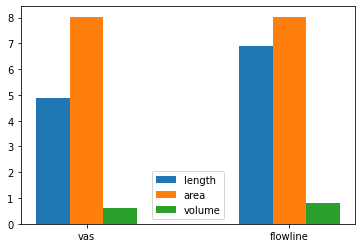

In [525]:
for i, var in enumerate(variables[::-1]):
    ds_plot = ds.sel(normalized=False, time=0, mb_model='constant', temp_bias=0)
    x = np.array([0,3])
    plt.bar(x+(i*0.5), ds_plot[var]/10**(3*(i+1)), label='{}'.format(var), width=0.5)

plt.legend()
plt.xticks([0.5, 3.5], ['vas', 'flowline'])

In [528]:
ds_plot

<xarray.DataArray 'length' (model: 2)>
array([4894.63693267, 6900.        ])
Coordinates:
    calendar_month  int64 10
    calendar_year   int64 -1
    hydro_year      int64 0
    hydro_month     int64 1
  * model           (model) object 'vas' 'fl'
    normalized      bool False
    temp_bias       float64 0.0
    time            float64 0.0
    rgi_id          <U14 'RGI60-11.00897'
    mb_model        <U8 'constant'
Attributes:
    description:  Glacier length
    units:        m

In [ ]:
    x = np.array([0,2,4])
    plt.bar(x+(i*0.5), ds_plot/10**(3*(i+1)), label='{}'.format(var), width=0.5)



800364081.71
8036000.00
6900.00
596297884.17
8036000.00
4894.64


(0.0, 10.0)

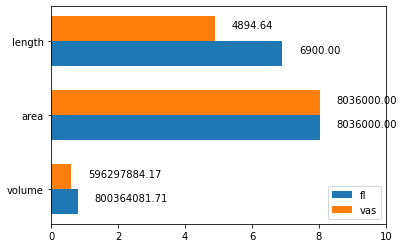

In [613]:
model = 'vas', 'flowline'
for i, model in enumerate(models[::-1]):
    ds_plot = ds.sel(normalized=False, time=0, mb_model='constant', temp_bias=0, model=model)
    x = np.array([0,1.5,3])+0.25+i*0.5
    values = ds_plot.volume, ds_plot.area, ds_plot.length
    height = ds_plot.volume/1e9, ds_plot.area/1e6, ds_plot.length/1e3
    plt.barh(x, height, label=model, height=0.5)

    for x_, y, v in zip(x, height, values):
        plt.text(y + 0.5, x_, '{:.2f}'.format(v.values), rotation=0)
        print('{:.2f}'.format(v.values))
    
plt.legend(loc=4)
plt.yticks([0.5, 2, 3.5], variables)
plt.xlim([0, 10])

In [615]:
596297884.17/(4894.64**2*1.4179698506016887)

17.553137769257216

In [609]:
ds_corr = ds.sel(model='vas', mb_model='random', normalized=False, time=slice(0,100)).volume
xr.corr(ds_corr.sel(temp_bias=+.5), ds_corr.sel(temp_bias=-.5))

<xarray.DataArray 'volume' ()>
array(-0.69395365)
Coordinates:
    model       <U3 'vas'
    normalized  bool False
    rgi_id      <U14 'RGI60-11.00897'
    mb_model    <U6 'random'

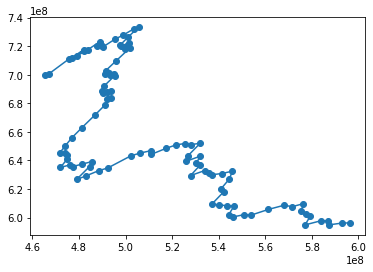

In [610]:
plt.plot(ds_corr.sel(temp_bias=+.5), ds_corr.sel(temp_bias=-.5), marker='o')

In [588]:
1.4179698506016887 * 8

count    1000.000000
mean       24.700000
std        87.450315
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       900.000000
Name: length, dtype: float64